# PREPARATION

## import librairies

In [1]:
import tensorflow as tf
import keras as ks
# general
import os
import sys
import io

import argparse
from datetime import datetime
import h5py
import importlib

# Indispensables
import pandas as pd
import numpy as np
import geopandas as gpd
import math

# VISU
from IPython.display import Image, IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm


import colorsys
print('TensorFlow: %s' % tf.__version__)
print('Kerasw: %s' % ks.__version__)
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
print('Geo Panda version: %s' % gpd.__version__)


Using TensorFlow backend.


TensorFlow: 2.0.0
Kerasw: 2.3.1
Panda version: 0.25.1
Numpy version: 1.17.2
Geo Panda version: 0.7.0


In [5]:
import platform

print(os.name)
print(platform.system())
print(platform.release())


posix
Darwin
18.7.0


## Déclaration des directories et variables

In [6]:
BASE_DIR = os.getcwd()

separe = "/"
# Eurométropole
if platform.system() == 'Windows':
    DATA_DIR = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    separe = "\\"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
#
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
Data ROOT directory: /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/


['/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python37.zip',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/lib-dynload',
 '',
 '/Users/pierreleisy/.local/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pierreleisy/.ipython',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesNumPoints5m\\']

## création des listes d'images

In [8]:
from os import listdir
#from os.path import isfile, join
#from os import walk
import glob

#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#[:2]  
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#[:2]   
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 58773 58768


# DONNEES

## Lecture des images (tests)

In [9]:
from PIL import Image
import rasterio
import imageio

print(liste_1[:2])
fichier1 = liste_1[0]
print(fichier1)
im1 = imageio.imread(fichier1)
print(im1.shape)
df1 = pd.DataFrame(im1)
print(df1)

print(liste_2[:2])
fichier2 = liste_2[0]
print(fichier2)
im2 = imageio.imread(fichier2)
print(im2.shape)
df2 = pd.DataFrame(im2)
#print(df2)

print(liste_3[:2])
fichier3 = liste_3[0]
print(fichier3)
im3 = imageio.imread(fichier3)
print(im3.shape)
df3 = pd.DataFrame(im3)
#print(df3)
df3.describe()

['/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesNumPoints5m/2043020_7272860_NumPoints5m.tif', '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesNumPoints5m/2042520_7272025_NumPoints5m.tif']
/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesNumPoints5m/2043020_7272860_NumPoints5m.tif
(10, 10)
     0    1    2    3    4    5    6    7    8    9
0  6.0  5.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  3.0  1.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  7.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  1.0  4.0  2.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0
6  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0
7  0.0  0.0  0.0  2.0  0.0  0.0  2.0  6.0  1.0  1.0
8  1.0  1.0  0.0  0.0  0.0  0.0  1.0  6.0  1.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  4.0  1.0
['/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesEcartZ5m/2043320_7272425_EcartZ5m.tif', '/Users/pierreleisy/Data_S

,0,1,2,3,4,5,6,7,8,9
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [30]:
fich_lamp = DATA_DIR+"LampadairePresence_0_1_5m.asc"
header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
#ylow = pd.read_csv(fich_lamp, sep=" ", skiprows=3, header=None, nrows=1)[1]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
#print(lampadaires.count())
print(lampadaires[0].value_counts())
print(lampadaires.columns)
#print(lampadaires.nunique())
print(lampadaires.nunique().agg(['mean','count','sum']))

# print(lampadaires.describe())
lampes = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))
print(lampes.shape)

Bord inférieur gauche: 2042500 7272000 200 200 5
0.0    197
1.0      3
Name: 0, dtype: int64
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)
mean       1.79
count    200.00
sum      358.00
dtype: float64
(40000, 1)


In [32]:
#print(lampadaires.describe())
lampadaires.sum().sum()

357.0

In [33]:
lampes['NumI'] = lampes.index
lampes['NumY'] = lampes['NumI'].mod(other=n_col)
lampes['NumX'] = ((lampes['NumI'] - n_row + 1) / n_row).apply(np.ceil)
# ou est   erreur avant ???
#lampes['NumX'] = lampes['NumI'].mod(other=n_col)
#lampes['NumY'] = lampes['Num'].apply(np.ceil)

#lampes = lampes.drop(['Num'], axis=1)
lampes.rename(columns={0: 'present'}, inplace=True)
lampes = lampes.astype({'present': 'int8'}, copy=False)
lampes = lampes.astype({'NumY': 'int32'}, copy=False)
lampes = lampes.astype({'NumI': 'int32'}, copy=False)
lampes = lampes.astype({'NumX': 'int32'}, copy=False)
lampes.dtypes

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object

In [34]:
#lampes['X'] = xlow + np.round((lampes['Num0'] - n_row + 1)/n_row, 0) * cell_size
#lampes['X'] = xlow + lampes.index + (n_row - lampes.index) * n_col
#print(lampes.describe(include='all'))
lampes['X'] = xlow + lampes['NumX'] * cell_size
lampes['Y'] = ylow + lampes['NumY'] * cell_size
lampes['nom_NUM'] = lampes['X'].map(str) + "_" + lampes['Y'].map(str) +  "_NumPoints5m.tif"
lampes['nom_ECA'] = lampes['X'].map(str) + "_" + lampes['Y'].map(str) + "_EcartZ5m.tif"
lampes['nom_POS'] = lampes['X'].map(str) + "_" + lampes['Y'].map(str) +  "_Position5m.tif"
lampes.head(2) 

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif


In [21]:
print(lampes.shape)
lampes2 = lampes[lampes['present'] > 0]
print(lampes2.shape)

(40000, 9)
(357, 9)


In [22]:
lampes2

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
319,1,319,119,1,2042505,7272595,2042505_7272595_NumPoints5m.tif,2042505_7272595_EcartZ5m.tif,2042505_7272595_Position5m.tif
349,1,349,149,1,2042505,7272745,2042505_7272745_NumPoints5m.tif,2042505_7272745_EcartZ5m.tif,2042505_7272745_Position5m.tif
696,1,696,96,3,2042515,7272480,2042515_7272480_NumPoints5m.tif,2042515_7272480_EcartZ5m.tif,2042515_7272480_Position5m.tif
745,1,745,145,3,2042515,7272725,2042515_7272725_NumPoints5m.tif,2042515_7272725_EcartZ5m.tif,2042515_7272725_Position5m.tif
922,1,922,122,4,2042520,7272610,2042520_7272610_NumPoints5m.tif,2042520_7272610_EcartZ5m.tif,2042520_7272610_Position5m.tif
...,...,...,...,...,...,...,...,...,...
38410,1,38410,10,192,2043460,7272050,2043460_7272050_NumPoints5m.tif,2043460_7272050_EcartZ5m.tif,2043460_7272050_Position5m.tif
38606,1,38606,6,193,2043465,7272030,2043465_7272030_NumPoints5m.tif,2043465_7272030_EcartZ5m.tif,2043465_7272030_Position5m.tif
38614,1,38614,14,193,2043465,7272070,2043465_7272070_NumPoints5m.tif,2043465_7272070_EcartZ5m.tif,2043465_7272070_Position5m.tif
38802,1,38802,2,194,2043470,7272010,2043470_7272010_NumPoints5m.tif,2043470_7272010_EcartZ5m.tif,2043470_7272010_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [10]:
#test image 10x10 sur 10 lignes

print(os.getcwd())

list_lamp1 = lampes2['nom_NUM']
print(list_lamp1.shape)
i=0
for n,fich in enumerate(list_lamp1):
    fiche = DALLE_NUM+fich  
    if os.path.exists(fiche):
        i += 1
        #print(n, fiche)
        data = imageio.imread(fiche)
        indices = [j for j in range((i-1)*10, i*10)]
        df_int = pd.DataFrame(data, index=indices)
        if i == 1:
            print(data)
            df = df_int
        else:
            df = pd.concat([df, df_int])
    
print(n, i, df.shape, df.shape[0]/i)
df        

C:\Users\STG3841\Mes Documents (local)\travail
(357,)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
356 267 (2670, 10) 10.0


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2665,0.0,0.0,4.0,2.0,0.0,0.0,5.0,3.0,0.0,4.0
2666,0.0,3.0,6.0,4.0,0.0,2.0,1.0,1.0,0.0,3.0
2667,0.0,5.0,1.0,5.0,0.0,3.0,5.0,0.0,1.0,0.0
2668,0.0,0.0,7.0,0.0,0.0,3.0,8.0,0.0,4.0,1.0


In [46]:
N = n_row*n_col  # N=100    TODO mettre le produit des dimension de la matrice image

print(os.getcwd())
list_lamp1 = lampes2['nom_NUM']
list_lamp2 = lampes2['nom_ECA']
print(list_lamp1.shape, list_lamp2.shape)
i=0
for n,fich1 in enumerate(list_lamp1):
    fiche1 = DALLE_NUM+fich1
    fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
    fiche2 = DALLE_ECA+fich2
    if os.path.exists(fiche1) and os.path.exists(fiche2):    # Manque des fichiers sur les 40000
        i += 1
        data1 = np.reshape(imageio.imread(fiche1), N) #.flatten()
        data1T = np.expand_dims(data1, axis=0)
        data2 = np.reshape(imageio.imread(fiche2), N)
        data2T = np.expand_dims(data2, axis=0)
        #print(i, dataT.shape)
        df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
        df_int2 = pd.DataFrame(data2T, index=[i])  #, index=indices)
        # MERGE 
        df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        if i == 1:
            #print(dataT)
            df = df_int
        else:
            df = pd.concat([df, df_int])
    else:
        pass
        #print(fiche1, fich2)
if i > 0:
    print(n+1, i, n+1-i, df.shape, df.shape[0]/i)

for n in range(0,N):
    df = df.astype({str(n)+'_num': 'int8'}, copy=False)
print(df.dtypes)
df

C:\Users\STG3841\Mes Documents (local)\travail
(357,) (357,)
357 267 90 (267, 200) 1.0
0_num       int8
1_num       int8
2_num       int8
3_num       int8
4_num       int8
          ...   
95_h     float64
96_h     float64
97_h     float64
98_h     float64
99_h     float64
Length: 200, dtype: object


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,90_h,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.24,0.25,0.00,0.0
5,0,2,0,1,3,1,0,0,0,0,...,0.06,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,4,0,0,1,0,4,0,...,0.03,0.0,0.00,0.03,0.00,0.03,0.08,0.05,0.05,0.0
264,3,0,5,2,2,0,4,5,2,0,...,0.03,0.0,0.01,0.00,0.01,0.00,0.00,0.03,0.00,0.0
265,0,0,0,3,1,0,0,3,0,0,...,0.00,0.0,0.04,0.00,0.00,0.00,0.01,0.00,0.00,0.0
266,1,4,1,0,0,2,0,0,0,0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


## statistiques

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,90_h,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.689139,0.756554,0.636704,0.606742,0.483146,0.636704,0.629213,0.494382,0.554307,0.617978,...,0.066667,0.058464,0.056779,0.103745,0.138689,0.132247,0.174569,0.129738,0.100375,0.109850
std,1.578996,1.735494,1.642665,1.345709,1.208793,1.419203,1.514705,1.199532,1.337659,1.460036,...,0.272269,0.304814,0.308443,0.646075,0.767919,0.542305,0.816093,0.540570,0.503468,0.710922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,11.000000,15.000000,7.000000,7.000000,7.000000,11.000000,8.000000,8.000000,9.000000,...,2.950000,3.230000,4.290000,9.360000,8.960000,5.420000,8.430000,4.490000,5.530000,9.600000


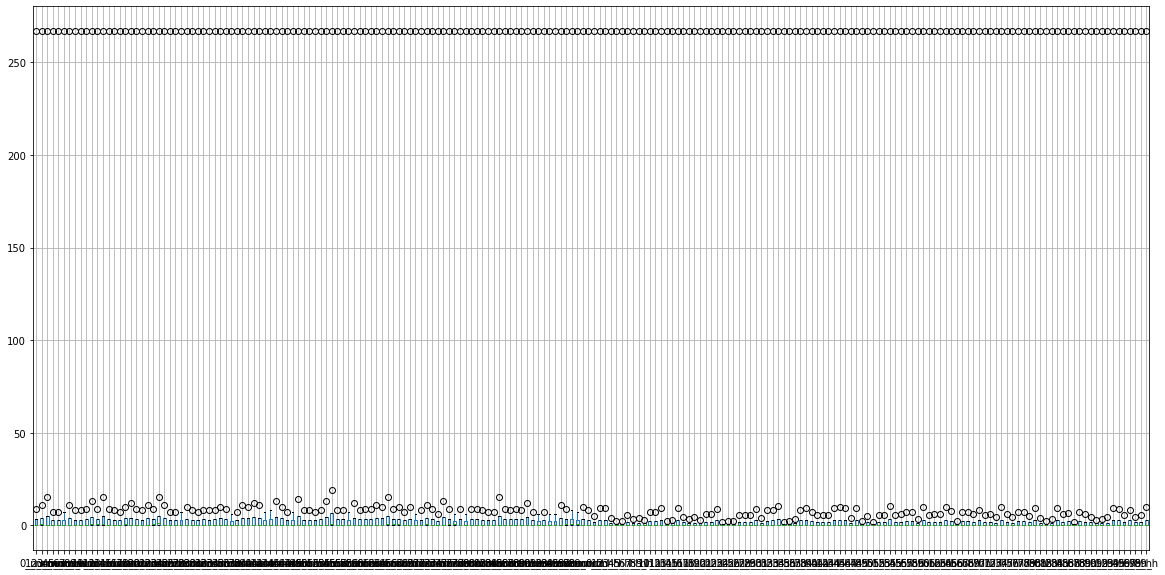

In [55]:

plt.figure(figsize=(20,10))
_ = df.describe(include='all').boxplot()

df.describe()

In [45]:
lampes.head(2)
lampes.nunique()


present        2
NumI       40000
NumY         200
NumX         200
X            200
Y            200
nom_NUM    40000
nom_ECA    40000
nom_POS    40000
dtype: int64

In [ ]:
# Read files in subdirectories
#liste_f = ["liste_1", "liste_2", "liste_3"]
for n in range(0,len(liste_1)):
#for n in range(0,1):
    #for i in range(0,len(liste_f)):
    #with open(liste_f[n]) as fichierNum:
    with open(liste_3[n]):
        fichierNum3 = liste_3[n]
        df_3a = imageio.imread(fichierNum3)
        df_3 = pd.DataFrame(df_3a)
    print(df_3a.shape, "\n", df_3)
    
    with open(liste_1[n]):         # as fichierNum1:
        fichierNum1 = liste_1[n]
        df_1a = imageio.imread(fichierNum1)
        df_1 = pd.DataFrame(df_1a)
    print(df_1a.shape, "\n", df_1)
    with open(liste_2[n]):         # as fichierNum2:
        fichierNum2 = liste_2[n]
        print(fichierNum2)
        df_2a = imageio.imread(fichierNum2)
        df_2 = pd.DataFrame(df_2a)
    print(df_2a.shape, "\n", df_2)


In [ ]:
tf.keras.datasets

In [ ]:
# Charge les données
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets(donnees)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout     #LSTM

N = 100
M = 64
# ou model = Sequential() + model.add(Dense(N)) + model.add(Dropout(0.5)) + model.add(Activation('softmax'))
model = Sequential([
    Dense(64, activation='relu', input_shape=(N,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'],)

model.fit(train_data, train_labels, epoch=5, batch_size=M)

